In [2]:
import numpy
import pandas as pd
import sklearn as scikit_learn

In [3]:
df_ludnosc = pd.read_csv("../data/ludnosc.csv", sep=";")
df_ludnosc.tail(10)

,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
25864,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2011,"21,4",%,NaN,NaN
25865,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2012,"20,6",%,NaN,NaN
25866,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2013,"21,5",%,NaN,NaN
25867,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2014,"19,7",%,NaN,NaN
25868,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2015,"19,9",%,NaN,NaN
25869,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2016,"19,9",%,NaN,NaN
25870,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2017,"19,5",%,NaN,NaN
25871,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2018,"19,5",%,NaN,NaN
25872,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2019,"19,3",%,NaN,NaN
25873,Wydatki,3200000,ZACHODNIOPOMORSKIE,udział wydatków na użytkowanie mieszkania i no...,2020,"20,3",%,NaN,NaN


In [4]:
kategorie = ["towary i usługi konsumpcyjne", "żywność i napoje bezalkoholowe", "napoje alkoholowe i wyroby tytoniowe", "odzież i obuwie",
             "użytkowanie mieszkania lub domu i nośniki energii", "wyposażenie mieszkania i prowadzenie gospodarstwa domowego", "zdrowie",
             "transport", "łączność", "rekreacja i kultura", "edukacja", "restauracje i hotele", "pozostałe wydatki na towary i usługi"]

In [5]:
lata = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [6]:
nazwa = ['DOLNOŚLĄSKIE', 'KUJAWSKO-POMORSKIE', 'LUBELSKIE', 'LUBUSKIE', 'ŁÓDZKIE', 'MAŁOPOLSKIE', 'MAZOWIECKIE', 'OPOLSKIE', 'PODKARPACKIE',
         'PODLASKIE', 'POMORSKIE', 'ŚLĄSKIE', 'ŚWIĘTOKRZYSKIE', 'WARMIŃSKO-MAZURSKIE', 'WIELKOPOLSKIE', 'ZACHODNIOPOMORSKIE']

In [7]:
df_ludnosc['Rok'] = df_ludnosc['Rok'].apply(int)
df_ludnosc['Wartosc'] = df_ludnosc['Wartosc'].apply(str).str.replace(',','.').apply(float)

In [10]:
df = df_ludnosc[(df_ludnosc['Rok'].isin(lata)) & (df_ludnosc['Nazwa'].isin(nazwa)) & (df_ludnosc['Kategoria'] == 'Wydatki') & (df_ludnosc['Zmienna'].isin(kategorie))].drop(['Kod', 'Jednostka miary', 'Atrybut', 'Unnamed: 8', 'Kategoria'], axis=1)
df = df.reset_index(drop=True)
df

,Nazwa,Zmienna,Rok,Wartosc
0,DOLNOŚLĄSKIE,towary i usługi konsumpcyjne,2003,655.96
1,DOLNOŚLĄSKIE,towary i usługi konsumpcyjne,2004,663.23
2,DOLNOŚLĄSKIE,towary i usługi konsumpcyjne,2005,673.28
3,DOLNOŚLĄSKIE,towary i usługi konsumpcyjne,2006,729.74
4,DOLNOŚLĄSKIE,towary i usługi konsumpcyjne,2007,820.47
...,...,...,...,...
3739,ZACHODNIOPOMORSKIE,pozostałe wydatki na towary i usługi,2016,63.37
3740,ZACHODNIOPOMORSKIE,pozostałe wydatki na towary i usługi,2017,78.49
3741,ZACHODNIOPOMORSKIE,pozostałe wydatki na towary i usługi,2018,77.46
3742,ZACHODNIOPOMORSKIE,pozostałe wydatki na towary i usługi,2019,73.17


In [29]:
df_p = pd.pivot_table(data=df, values='Wartosc', index=['Nazwa', 'Rok'], columns=['Zmienna']).reset_index()  
df_p

Zmienna,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe
0,DOLNOŚLĄSKIE,2003,10.36,22.45,33.92,34.63,45.54,14.34,655.96,52.53,147.77,33.24,35.89,33.36,187.14
1,DOLNOŚLĄSKIE,2004,9.33,20.08,31.94,37.81,46.86,15.95,663.23,55.72,143.14,32.38,35.92,34.07,194.16
2,DOLNOŚLĄSKIE,2005,9.24,20.44,31.65,32.71,53.14,17.33,673.28,64.82,136.43,32.99,37.96,38.63,191.52
3,DOLNOŚLĄSKIE,2006,9.72,21.62,37.07,40.55,56.27,19.59,729.74,60.86,152.58,38.97,40.02,40.36,202.59
4,DOLNOŚLĄSKIE,2007,11.87,24.70,43.93,45.17,67.90,17.55,820.47,72.22,167.95,49.98,46.06,43.87,218.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,ŚWIĘTOKRZYSKIE,2016,5.02,18.89,57.80,57.50,62.12,32.21,930.20,72.60,195.53,53.00,60.88,46.91,266.04
284,ŚWIĘTOKRZYSKIE,2017,7.25,19.97,60.68,72.24,55.85,37.42,998.54,83.91,200.30,58.40,68.84,49.15,282.86
285,ŚWIĘTOKRZYSKIE,2018,7.45,23.01,58.92,65.38,55.51,46.28,1030.85,107.91,199.26,76.93,56.21,34.63,298.18
286,ŚWIĘTOKRZYSKIE,2019,4.93,22.98,53.27,64.08,49.79,39.33,1015.24,92.76,197.27,65.25,69.44,46.10,308.59


In [35]:
di = {'DOLNOŚLĄSKIE' : 0, 'KUJAWSKO-POMORSKIE' : 1, 'LUBELSKIE' : 2, 'LUBUSKIE' : 3, 'ŁÓDZKIE' : 4, 'MAŁOPOLSKIE' : 5, 'MAZOWIECKIE' : 6, 'OPOLSKIE' : 7,
      'PODKARPACKIE' : 8, 'PODLASKIE' : 9, 'POMORSKIE' : 10, 'ŚLĄSKIE' : 11, 'ŚWIĘTOKRZYSKIE' : 12, 'WARMIŃSKO-MAZURSKIE' : 13, 'WIELKOPOLSKIE' : 14,
      'ZACHODNIOPOMORSKIE' : 15}
df_p = df_p.replace({'Nazwa': di})
df_p

Zmienna,Nazwa,Rok,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,towary i usługi konsumpcyjne,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe
0,0,2003,10.36,22.45,33.92,34.63,45.54,14.34,655.96,52.53,147.77,33.24,35.89,33.36,187.14
1,0,2004,9.33,20.08,31.94,37.81,46.86,15.95,663.23,55.72,143.14,32.38,35.92,34.07,194.16
2,0,2005,9.24,20.44,31.65,32.71,53.14,17.33,673.28,64.82,136.43,32.99,37.96,38.63,191.52
3,0,2006,9.72,21.62,37.07,40.55,56.27,19.59,729.74,60.86,152.58,38.97,40.02,40.36,202.59
4,0,2007,11.87,24.70,43.93,45.17,67.90,17.55,820.47,72.22,167.95,49.98,46.06,43.87,218.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,12,2016,5.02,18.89,57.80,57.50,62.12,32.21,930.20,72.60,195.53,53.00,60.88,46.91,266.04
284,12,2017,7.25,19.97,60.68,72.24,55.85,37.42,998.54,83.91,200.30,58.40,68.84,49.15,282.86
285,12,2018,7.45,23.01,58.92,65.38,55.51,46.28,1030.85,107.91,199.26,76.93,56.21,34.63,298.18
286,12,2019,4.93,22.98,53.27,64.08,49.79,39.33,1015.24,92.76,197.27,65.25,69.44,46.10,308.59


In [109]:
df_p.isna().sum()

Zmienna
Nazwa                                                         0
Rok                                                           0
edukacja                                                      0
napoje alkoholowe i wyroby tytoniowe                          0
odzież i obuwie                                               0
pozostałe wydatki na towary i usługi                          0
rekreacja i kultura                                           0
restauracje i hotele                                          0
towary i usługi konsumpcyjne                                  0
transport                                                     0
użytkowanie mieszkania lub domu i nośniki energii             0
wyposażenie mieszkania i prowadzenie gospodarstwa domowego    0
zdrowie                                                       0
łączność                                                      0
żywność i napoje bezalkoholowe                                0
dtype: int64

In [36]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [117]:
X_to_pca = np.array(df_p.iloc[:,2:15])
X_to_pca

array([[ 10.36,  22.45,  33.92, ...,  35.89,  33.36, 187.14],
       [  9.33,  20.08,  31.94, ...,  35.92,  34.07, 194.16],
       [  9.24,  20.44,  31.65, ...,  37.96,  38.63, 191.52],
       ...,
       [  7.45,  23.01,  58.92, ...,  56.21,  34.63, 298.18],
       [  4.93,  22.98,  53.27, ...,  69.44,  46.1 , 308.59],
       [  7.74,  24.63,  42.24, ...,  54.54,  49.04, 309.99]])

In [118]:
pipeline = make_pipeline(StandardScaler(), PCA())
X = pipeline.fit_transform(X_to_pca)

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [143]:
X = pipeline.fit_transform(X_to_pca)
X

array([[-3.82157946,  0.57543079,  0.49905228, ..., -0.24188387,
         0.33182884, -0.0045344 ],
       [-3.85064313,  0.32400352,  0.25744525, ..., -0.05526991,
        -0.03618867, -0.02677638],
       [-3.58410877,  0.43053337,  0.29515047, ...,  0.41540309,
         0.08177266, -0.01261586],
       ...,
       [ 1.72301904, -1.16930846, -1.7286675 , ..., -0.54325152,
         0.21579346, -0.01779816],
       [ 1.49027054, -2.06088735, -1.20133328, ..., -0.02431944,
         0.32575964, -0.01729765],
       [ 0.577483  , -1.60298491, -0.16551631, ..., -0.01940194,
        -0.28338211, -0.03477444]])

In [144]:
y = df_p['Nazwa']
y

0       0
1       0
2       0
3       0
4       0
       ..
283    12
284    12
285    12
286    12
287    12
Name: Nazwa, Length: 288, dtype: int64

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [148]:
k_range = range(1,10)
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

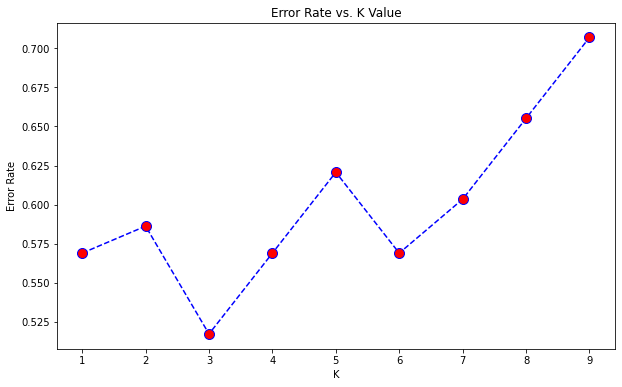

In [150]:
plt.figure(figsize=(10,6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [155]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [156]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {round(knn.score(X_test, y_test), 4)*100}%")

              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.22      0.67      0.33         3
           2       0.38      1.00      0.55         3
           3       0.29      0.33      0.31         6
           4       0.50      0.50      0.50         2
           5       0.67      0.80      0.73         5
           6       1.00      0.75      0.86         4
           8       1.00      0.40      0.57         5
           9       0.50      0.25      0.33         4
          10       0.20      0.25      0.22         4
          11       0.50      0.25      0.33         4
          12       0.67      0.67      0.67         3
          13       1.00      0.25      0.40         4
          14       1.00      0.50      0.67         4
          15       1.00      0.50      0.67         2

    accuracy                           0.48        58
   macro avg       0.62      0.50      0.50        58
weighted avg       0.61   